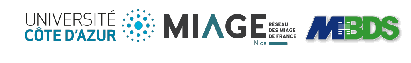

##### Deep Bridge - Nader CHATTI



# **Classification non supervisée à partir des images IRM**

## Importation de l’environnement / Initialisation

In [ ]:
from google.colab import drive
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from sklearn.cluster import KMeans

## Chargement des données

## Accès à My Google Drive

In [ ]:
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/Dataset_Brain_MRI/All_Images_No_Masks/"

## Chargement des données

In [ ]:
image_files = sorted([os.path.join(path, file)
                      for file in os.listdir(path)
                      if file.endswith('.tif')])

original_img = cv2.imread(image_files[650])
#original_img = cv2.imread(image_files[750])
#original_img = cv2.imread(image_files[1050])
#original_img = cv2.imread(image_files[10])
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.imshow(original_img), plt.title("Original Image")
plt.show()

## Prétraitement de l'image

In [ ]:
# Supprimer le bruit
no_noise = []
blur = cv2.GaussianBlur(original_img, (5, 5), 0)
original_img = blur

# Suppression supplémentaire du bruit (Morphologie)
kernel = np.ones((3, 3), np.uint8)
original_img = cv2.morphologyEx(original_img, cv2.MORPH_OPEN, kernel, iterations=2)

In [ ]:
# Redimensionnement de l'image en un tableau 2D de pixels et 3 valeurs de couleur (RVB)
pixel_values = original_img.reshape((-1, 3))
# Convertir en float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

## Clustering - Application de la méthode KMEANS

In [ ]:
# Définir des critères d'arrêt
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
# Nombre des clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# Reconvertir en valeurs 8 bits
centers = np.uint8(centers)

# Aplatir les labels du tableau
labels = labels.flatten()

## Segmentation de l'image

In [ ]:
# convertir tous les pixels à la couleur des centroïdes
segmented_image = centers[labels.flatten()]

In [ ]:
# Redimensionnement à la dimension originale de l'image
segmented_image = segmented_image.reshape(original_img.shape)
# Affichage de l'image
plt.imshow(segmented_image), plt.title("Segmented Image")
plt.show()

## Affichage des classes isolées les unes des autres

In [ ]:
# Désactiver les différents clusters un à un (transformer le pixel en noir)
masked_image = np.copy(original_img)
# Convertir en la forme d'un vecteur de valeurs de pixels
masked_image = masked_image.reshape((-1, 3))

def isolation(masked_image, cluster):
  img = np.copy(masked_image)
  for i in range(4):
    if (i != cluster):
      # i est la couleur (c.-à-d. cluster) à désactiver
      img[labels == i] = [0, 0, 0]
  return img

cluster1 = isolation(masked_image, 0)
cluster2 = isolation(masked_image, 1)
cluster3 = isolation(masked_image, 2)
cluster4 = isolation(masked_image, 3)

# Redimensionnement à la dimension originale de l'image
cluster1 = cluster1.reshape(original_img.shape)
cluster2 = cluster2.reshape(original_img.shape)
cluster3 = cluster3.reshape(original_img.shape)
cluster4 = cluster4.reshape(original_img.shape)

# Affichage des images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 10))

ax1.imshow(cluster1)
ax1.set_title('Cluster 1')
ax2.imshow(cluster2)
ax2.set_title('Cluster 2')
ax3.imshow(cluster3)
ax3.set_title('Cluster 3')
ax4.imshow(cluster4)
ax4.set_title('Cluster 4')

plt.show()